https://gramener.com/nas/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('EDA_nas.csv')
fig = px.box(df, x="Mother.edu", y="Maths..")
fig.show()

In [3]:
df = pd.read_csv('EDA_nas.csv')
fig = px.box(df, x="Mother.edu", y="Reading..")
fig.show()


Correlation Matrix:
             SilverPrice  GoldPrice
SilverPrice     1.000000   0.009584
GoldPrice       0.009584   1.000000


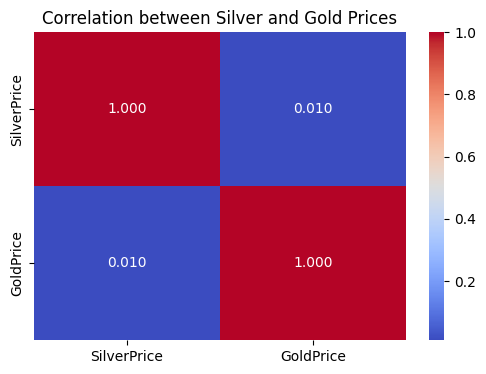

In [4]:
#Gold vs Sliver prices 

dfgold = pd.read_csv('EDA_Gold_Silver_prices.csv')
dfgold['year'] = dfgold['Month'].map(lambda x: x.split('-')[1])
dfgold = dfgold[dfgold['year'] == '08']

dfgold
# # Calculate the correlation matrix
correlation_matrix = dfgold[['SilverPrice', 'GoldPrice']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# # Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title("Correlation between Silver and Gold Prices")
plt.show()


In [5]:
dfcurrencies = pd.read_csv('currencies.csv')
dfcurrencies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Currency                    11 non-null     object 
 1   Chinese Yuan                11 non-null     float64
 2   Euro                        11 non-null     float64
 3   Japanese Yen                10 non-null     float64
 4   U.K. Pound Sterling         11 non-null     float64
 5   U.S. Dollar                 11 non-null     float64
 6   Algerian Dinar              9 non-null      float64
 7   Australian Dollar           11 non-null     float64
 8   Bahrain Dinar               11 non-null     float64
 9   Botswana Pula               9 non-null      float64
 10  Brazilian Real              11 non-null     float64
 11  Brunei Dollar               10 non-null     float64
 12  Canadian Dollar             10 non-null     float64
 13  Chilean Peso                11 non-nu

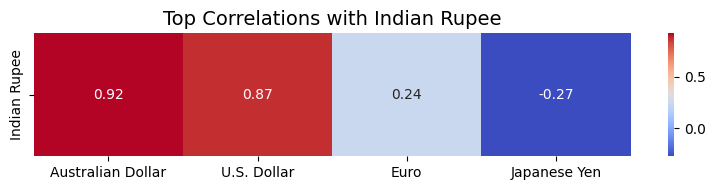

In [6]:
#Indian rupee is the most correlated with:?


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("currencies.csv")

# Convert all columns except 'Currency' to numeric (handle non-numeric gracefully)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop the 'Currency' column to prepare for correlation analysis
correlation_data = df.drop(columns=['Currency'])

# Compute the correlation of all currencies with Indian Rupee
indian_rupee_corr = correlation_data.corr()['Indian Rupee']

# Select top correlated currencies manually
top_corr_currencies = ['Australian Dollar', 'U.S. Dollar', 'Japanese Yen', 'Euro']
filtered_corr = indian_rupee_corr[top_corr_currencies].sort_values(ascending=False)

# Convert to DataFrame for plotting
filtered_corr_df = filtered_corr.to_frame().T

# Plot the correlation heatmap
plt.figure(figsize=(8, 2))
sns.heatmap(filtered_corr_df, cmap='coolwarm', annot=True)
plt.title("Top Correlations with Indian Rupee", fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\ujwal\AppData\Local\Temp\ipykernel_29320\2772962957.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




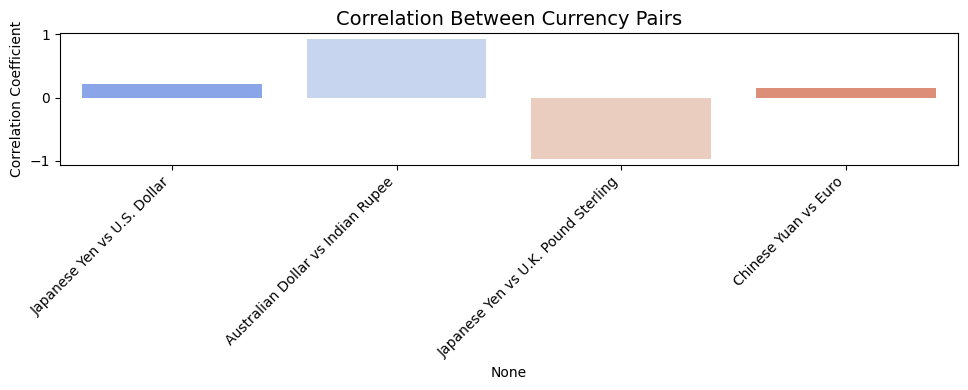

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("currencies.csv")

# Convert all columns except 'Currency' to numeric (handle non-numeric gracefully)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop the 'Currency' column to prepare for correlation analysis
correlation_data = df.drop(columns=['Currency'])

# Compute the full correlation matrix
correlation_matrix = correlation_data.corr()

# Define currency pairs for risk diversification analysis
currency_pairs = [
    ('Japanese Yen', 'U.S. Dollar'),
    ('Australian Dollar', 'Indian Rupee'),
    ('Japanese Yen', 'U.K. Pound Sterling'),
    ('Chinese Yuan', 'Euro')
]

# Create a DataFrame with selected correlations
selected_corr = {
    f"{c1} vs {c2}": correlation_matrix.loc[c1, c2]
    for c1, c2 in currency_pairs if c1 in correlation_matrix and c2 in correlation_matrix
}

# Convert to DataFrame for plotting
selected_corr_df = pd.DataFrame.from_dict(selected_corr, orient='index', columns=['Correlation'])

# Plot the correlations as a bar chart
plt.figure(figsize=(10, 4))
sns.barplot(x=selected_corr_df.index, y='Correlation', data=selected_corr_df, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title("Correlation Between Currency Pairs", fontsize=14)
plt.ylabel("Correlation Coefficient")
plt.tight_layout()
plt.show()


In [8]:
# Which player scored the highest number of centuries? how to create a pivot table to find
centuries_df = pd.read_csv('odi-batting.csv')
# Step 1: Filter only rows where player scored a century (100 or more)
centuries_df = centuries_df[centuries_df['Runs'] >= 100]

# Step 2: Create a pivot table to count centuries per player
century_counts = pd.pivot_table(centuries_df, index='Player', values='Runs', aggfunc='count')

# Step 3: Sort the result to find the player with most centuries
century_counts = century_counts.sort_values(by='Runs', ascending=False)

# Step 4: Display the top result
top_scorer = century_counts.head(1)
print("Player with the most centuries:\n", top_scorer)

Player with the most centuries:
                     Runs
Player                  
Sachin R Tendulkar    48


In [9]:
# The ‘strike rate’ of a batsman is defined as the (number of runs scored / number of 100 balls faced). It is a measure of ‘how fast a batsman has played’.For example, if a batsman scores 40 runs in 50 balls, the strike rate is 80 runs/100 balls.

# Among all the innings where a century was scored by a batsman, which one has the highest strike rate?



### Graded Assessment:

For this exercise, we will use the news popularity data set again which is a set of articles published by the digital media website Mashable over a period of two years.



You can download the data set from here https://cdn.upgrad.com/UpGrad/temp/d7137720-34c2-4066-9765-a20a035f94dc/popularity.csv



You can access the data dictionary of the news popularity dataset (to understand the variables in detail) here. https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

Q1. Compare the summary metrics of shares and choose the correct statement:

* The mean is comparable to the median
* The maximum number of shares is 843300
* The mean number of shares is lower than the median

In [10]:
dfg = pd.read_csv('popularity.csv')

In [11]:
dfg.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [12]:
dfg.columns = dfg.columns.str.strip()
dfg.shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [13]:
dfg.shares.median()

np.float64(1400.0)

In [14]:
dfg.shares.quantile(.78)

np.float64(3100.0)

### Assessment 2

Outliers



Roughly speaking, outliers are abnormally large or small values. There is no one fixed rule in deciding outliers. However, you would have noticed that going from the 99th to the 100th percentile, there is an approximately 25x increase in the number of shares.



You may have also noted that in the lower quartiles, there is only about 5% increase in the number of shares per percentile. This increases to about 10% per percentile in the higher quartiles and 20% beyond the 95th percentile. In this case, some articles in the top quartiles are clearly outliers.



To classify some articles as outliers, you may need to consult your client or the business to understand the reasons behind abnormal values. In some cases, they are justifiable, whereas in others they cannot be explained and are thus labelled as outliers.



For example, let’s say that you decide to label all the articles beyond the 95th percentile as outliers since you observe a roughly 20% increase in the number of shares beyond that. Thus, the last article you include will be the one at the 95th percentile. You remove every article beyond that point from the data set.

In [15]:
dfg.shares.quantile(.95)

np.float64(10800.0)

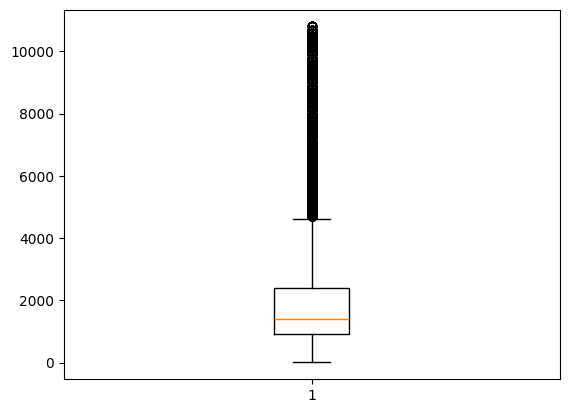

In [16]:
dfg = dfg.drop(index = dfg.query(f'shares > {dfg.shares.quantile(.95)}').index)
plt.boxplot(dfg.shares)
plt.show()

In [17]:
dfg.shares.describe()

count    37663.000000
mean      2074.334387
std       1871.814139
min          1.000000
25%        927.000000
50%       1400.000000
75%       2400.000000
max      10800.000000
Name: shares, dtype: float64

### Assessment 3

Let’s say you work at a central government body and want to compare the literacy rates of people across all the states in India. Your task is to understand the meanings of the rows and the attributes and find the number of literates, illiterates, literacy rate, etc. You have already downloaded the Census Data for the data sourcing exercise. In case you have not downloaded yet, do so from the link here https://cdn.upgrad.com/UpGrad/temp/1dcf9310-2223-4242-a8f9-807360f659d2/EDA_census.xlsx before attempting the following questions. 



Open the file in Excel and try to understand the column names. For this exercise, you will only need the following columns:

* C1-C4: The first four columns are self-explanatory
* C5: Total/Rural/Urban population
* C6: Age group (e.g. age- group = 7 would mean the number of people of age 7 in each column)
* C7-C9: Total population in that row
* C10-C12: Illiterate population in that row
* C13-C15: Literate population in that row


Delete the top few rows to convert it into a standard format with appropriate column names (you may have to rename some columns manually). Then, convert the file into a CSV and import into Python. Answer the following questions.

Q1. What percentage of females in the age group 20-24 are illiterate in India, i.e. out of all the females in the age group 20-24, what fraction is illiterate?

28%
23%
29%
40%

In [18]:
cencusdf = pd.read_csv('EDA_census.csv')
cencusdf.head()

,Table Name,State Code,Distt Code,Area Name,Total/Rural/Urban/,Age-group,Total,Unnamed: 7,Unnamed: 8,Illiterate,...,Technical diploma,Unnamed: 37,Unnamed: 38,Graduate & above,Unnamed: 40,Unnamed: 41,Unclassified,Unnamed: 43,Unnamed: 44,Unnamed: 45
0,NaN,NaN,NaN,NaN,NaN,NaN,Persons,Males,Females,Persons,...,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,NaN
1,C2308,0.0,0.0,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,...,7238719,5354161,1884558,68288971,42120460,26168511,3031570,1647116,1384454,NaN
2,C2308,0.0,0.0,INDIA,Total,0-6,164515253,85752254,78762999,164515253,...,0,0,0,0,0,0,0,0,0,NaN
3,C2308,0.0,0.0,INDIA,Total,7,24826640,12903364,11923276,6748214,...,0,0,0,0,0,0,136465,75715,60750,NaN
4,C2308,0.0,0.0,INDIA,Total,8,26968373,14061937,12906436,4131414,...,0,0,0,0,0,0,96524,52561,43963,NaN


### Assessment4
Comprehension: National Achievement Survey


To answer these questions, please download the attached data set here https://cdn.upgrad.com/UpGrad/temp/fbd7538c-5926-45ba-92b1-8c35c0ca890d/nas.csv. It contains information related to the performance of class VIII students of Maharashtra state. You may use either Python or Excel.



Note that the answer should be given on the basis of the above data set. You are not supposed to solve the following questions from the website app.


### Assessment 5
Let’s say you work as an analyst at UpGrad and you want to find interesting patterns in ‘the typical dates and times when UpGrad students submit their assignments’.



The data set provided here contains information on the dates and times of students’ submissions of an assignment. It has two variables — “submission” (the unique URL of a student’s submission on the platform) and “submit_time” (the date-time of submission).



This was the Association Rule Mining assignment whose submission deadline was Jan 3, 2017 - 11:59:59 PM. The second deadline was Jan 9, 2017 - 11:59 PM. Submissions between the first and the second deadline attract a 30% penalty in marks.



The variable ‘submission’ has several components separated by slashes. The last component contains the submitted filename in the format ‘roll_number.xxx’ where xxx is the file extension (.zip, .R etc.)



You want to understand:

The typical dates when students submit assignments

The typical times (hour of the day) of submissions



Extract all the relevant metrics (such as the date, day, month, year, hour, and minutes) of each person’s submission and attempt the following questions.  

Q1. What percentage of students submitted their solutions in .zip format?



95%



99%



75%



85%

Q2. How many students submitted the assignment after the first deadline (including the students who submitted after the second deadline) ?



40



39



44



41

In [19]:
import pandas as pd

# Load the dataset
df = pd.read_csv("grades.csv")

# Convert submit_time to datetime format
df['submit_time'] = pd.to_datetime(df['submit_time'], format="%m/%d/%y-%H:%M:%S")

# Define the first deadline
first_deadline = pd.to_datetime("01/03/17 23:59:59")

# Filter submissions after the first deadline
late_submissions = df[df['submit_time'] > first_deadline]

# Count how many students submitted late
late_submission_count = late_submissions.shape[0]

print("Number of students who submitted after the first deadline:", late_submission_count)


Number of students who submitted after the first deadline: 44


Q3. On which date did the most students submit the assignment?



2017-01-04



2017-01-09



2017-01-02



2017-01-03

In [20]:
# Assuming 'submit_time' is already converted to datetime
df['submit_date'] = df['submit_time'].dt.date

# Display the first few values
print(df[['submit_time', 'submit_date']].head())

          submit_time submit_date
0 2017-01-03 20:28:52  2017-01-03
1 2017-01-03 20:18:21  2017-01-03
2 2017-01-03 22:37:08  2017-01-03
3 2017-01-02 21:43:19  2017-01-02
4 2017-01-03 15:27:49  2017-01-03


In [21]:
df.groupby('submit_date')['submission'].count()

submit_date
2016-11-19      1
2016-12-19      1
2016-12-21      1
2016-12-28      2
2016-12-29      2
2016-12-30      6
2016-12-31      1
2017-01-01      6
2017-01-02     14
2017-01-03    120
2017-01-04     12
2017-01-06      1
2017-01-07      2
2017-01-08      3
2017-01-09     21
2017-01-10      3
2017-01-17      1
2017-02-03      1
Name: submission, dtype: int64

Q3 In which hour of the day did most students submit the solution?



23:00



22:00



21:00



01:00

In [22]:
# Assuming 'submit_time' is already converted to datetime
df['submit_hour'] = df['submit_time'].dt.hour

# Display the first few values
print(df[['submit_time', 'submit_date', 'submit_hour']].head())

          submit_time submit_date  submit_hour
0 2017-01-03 20:28:52  2017-01-03           20
1 2017-01-03 20:18:21  2017-01-03           20
2 2017-01-03 22:37:08  2017-01-03           22
3 2017-01-02 21:43:19  2017-01-02           21
4 2017-01-03 15:27:49  2017-01-03           15


In [23]:
df.groupby('submit_hour')['submission'].count().sort_values(ascending=False)

submit_hour
23    66
21    27
22    24
20    16
0     10
1      8
14     6
13     6
18     6
15     4
17     4
10     3
12     3
3      3
16     2
4      2
2      2
19     2
6      1
9      1
11     1
8      1
Name: submission, dtype: int64

In [24]:
most_common_hour = df['submit_hour'].mode()[0]
most_common_hour

np.int32(23)

Q4 If you plot the distribution of submissions by the hour, what can you observe?



Most people submit the assignment in the late evening (i.e. after 8 PM)



Most people submit the assignment in the afternoon (i.e. 12 noon - 4 PM)



Most people submit the assignment in the morning (i.e. 8 AM -11 AM)



Submissions are distributed evenly across hours of the day

In [25]:
df['submit_hour'].describe()

count    198.000000
mean      17.828283
std        7.278423
min        0.000000
25%       15.000000
50%       21.000000
75%       23.000000
max       23.000000
Name: submit_hour, dtype: float64

<Axes: ylabel='submit_hour'>

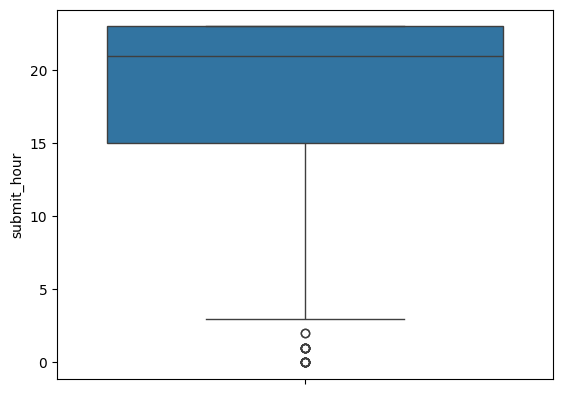

In [26]:
sns.boxplot(df['submit_hour'])

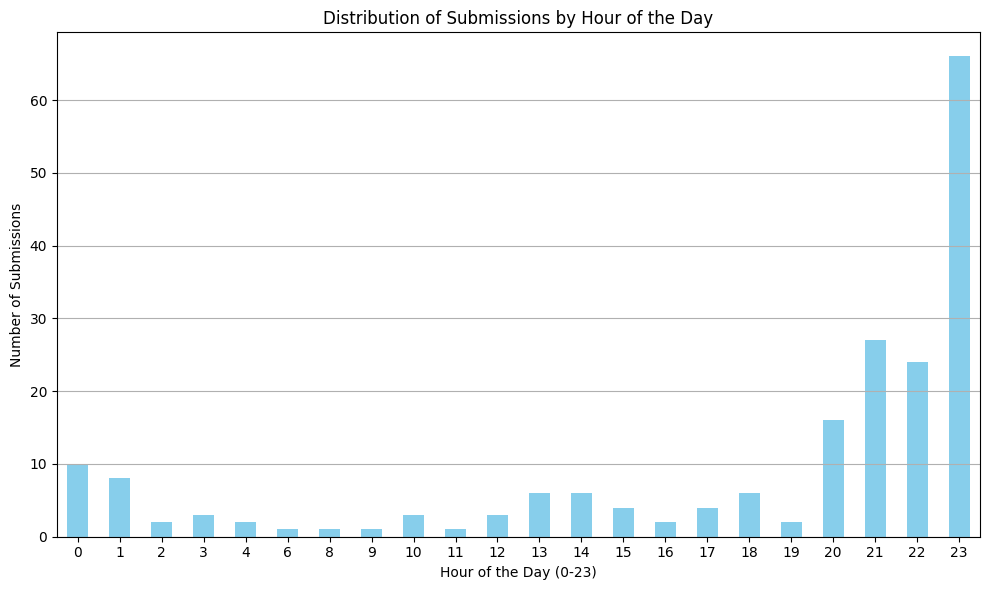

In [27]:


# Plot submission distribution by hour
plt.figure(figsize=(10, 6))
df['submit_hour'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Submissions by Hour of the Day')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Number of Submissions')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
